In [74]:
import os, json, re
import matplotlib.pyplot as plt

%matplotlib widget


In [75]:
mypath = "mn2as_mag_permuts_results"
onlyfiles = [
    f for f in 
    os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))
]

jsons = []
for file in onlyfiles:
    with open(os.path.join(mypath, file), "r+") as reader:
        jsons.append(json.load(reader))

{'name': 'Fi', 'run_uid': 'run_TAZLKWQMV2FEYL7O', 'competion_date': '18/07/2024 14:34:50', 'absolute_path': 'Mn2As/sp1_so0_orb0/Fi/Mn2As', 'inputs': {'material_name': 'Mn2As', 'struct': {'poscar': 'Mn2As\n1.0 Ang\n3.6150150000000001 0.0000000000000002 0.0000000000000002\n0.0000000000000000 3.6150150000000001 0.0000000000000002\n0.0000000000000000 0.0000000000000000 12.6698339999999998\nMn As \n8 4 \nDirect\n0.5000000000000000 0.0000000000000000 0.1764090000000000 Mn\n0.5000000000000000 0.5000000000000000 0.0000000000000000 Mn\n0.0000000000000000 0.0000000000000000 0.0000000000000000 Mn\n0.0000000000000000 0.5000000000000000 0.3235910000000000 Mn\n0.5000000000000000 0.0000000000000000 0.6764090000000000 Mn\n0.5000000000000000 0.5000000000000000 0.5000000000000000 Mn\n0.0000000000000000 0.0000000000000000 0.5000000000000000 Mn\n0.0000000000000000 0.5000000000000000 0.8235910000000000 Mn\n0.5000000000000000 0.0000000000000000 0.3691630000000000 As\n0.0000000000000000 0.5000000000000000 0.

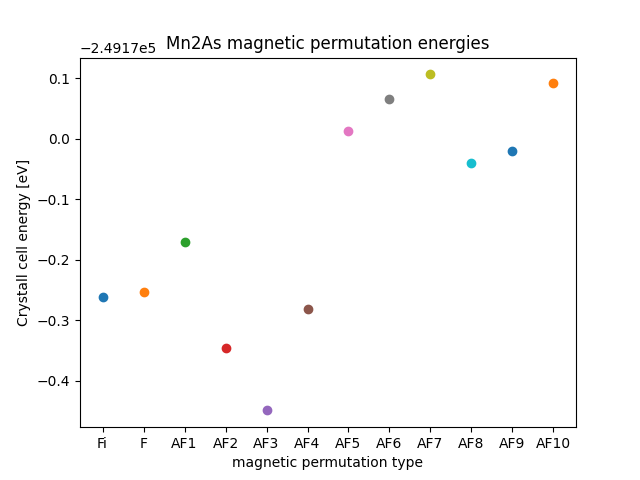

In [76]:
jsons.sort(key=lambda d: float("0" + re.sub("\D", "", d["name"])))

plt.figure()
plt.title("Mn2As magnetic permutation energies")
plt.xlabel("magnetic permutation type")
plt.ylabel("Crystall cell energy [eV]")
for dat in jsons:
    print(dat)
    plt.scatter(dat["name"], float(dat["results"]["energy_per_cell_eV"]))